In [ ]:
!nvidia-smi

Sat Mar 23 01:39:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content


In [ ]:
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!git checkout -q 57535c5a79791cb76e36fdb64975271354f10251
!pip install -q -e .

/content
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 430, done.
remote: Counting objects: 100% (199/199), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 430 (delta 150), reused 132 (delta 128), pack-reused 231
Receiving objects: 100% (430/430), 12.86 MiB | 29.85 MiB/s, done.
Resolving deltas: 100% (221/221), done.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━

In [ ]:
!pip uninstall -y supervision
!pip install -q supervision==0.6.0

import supervision as sv
print(sv.__version__)

Found existing installation: supervision 0.4.0
Uninstalling supervision-0.4.0:
  Successfully uninstalled supervision-0.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
groundingdino 0.1.0 requires supervision==0.4.0, but you have supervision 0.6.0 which is incompatible.
0.6.0


In [ ]:
!pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
groundingdino 0.1.0 requires supervision==0.4.0, but you have supervision 0.6.0 which is incompatible.


In [ ]:
import os

GROUNDING_DINO_CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(GROUNDING_DINO_CONFIG_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CONFIG_PATH))

/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [ ]:
%cd {HOME}
!mkdir -p {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content
/content/weights


In [ ]:
import os

GROUNDING_DINO_CHECKPOINT_PATH = os.path.join(HOME, "weights", "groundingdino_swint_ogc.pth")
print(GROUNDING_DINO_CHECKPOINT_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CHECKPOINT_PATH))


/content/weights/groundingdino_swint_ogc.pth ; exist: True


In [ ]:
import torch

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import Model

grounding_dino_model = Model(model_config_path=GROUNDING_DINO_CONFIG_PATH, model_checkpoint_path=GROUNDING_DINO_CHECKPOINT_PATH)

/content/GroundingDINO


/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
SAM_ENCODER_VERSION = "vit_h"

In [ ]:
f"{HOME}/drive/MyDrive/what ra sudeep?/frames-PS3"

'/content/drive/MyDrive/what ra sudeep?/frames-PS3'

In [ ]:
SOURCE_IMAGE_PATH = f"/content/drive/MyDrive/what ra sudeep?/frames-PS3/Abvmrci0.jpg"
CLASSES = ['people','parked vehicles','bad road markings','potholes','umbrella shops']
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

In [ ]:
from typing import List

def enhance_class_name(class_names: List[str]) -> List[str]:
    return [
        f"all {class_name}s"
        for class_name
        in class_names
    ]

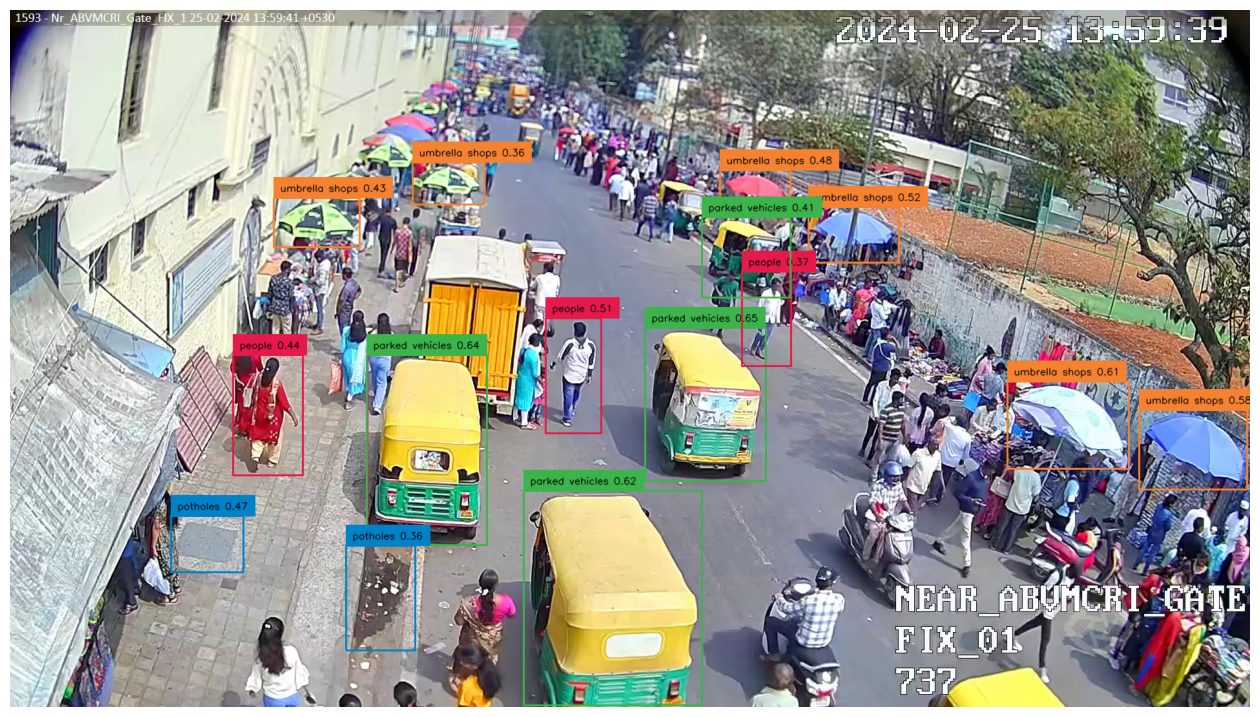

In [ ]:
import cv2
import supervision as sv

# load image
image = cv2.imread(SOURCE_IMAGE_PATH)

# detect objects
detections = grounding_dino_model.predict_with_classes(
    image=image,
    classes=enhance_class_name(class_names=CLASSES),
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

# annotate image with detections
box_annotator = sv.BoxAnnotator()
labels = [
    f"{CLASSES[class_id]} {confidence:0.2f}"
    for _, _, confidence, class_id, _
    in detections]
annotated_frame = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

In [ ]:
import os

IMAGES_DIRECTORY = "/content/drive/MyDrive/what ra sudeep?/frames-PS3"
IMAGES_EXTENSIONS = ['jpg', 'jpeg', 'png']

CLASSES = ['people','parked vehicles','bad road markings','potholes','umbrella shops','road-side shops']
BOX_TRESHOLD = 0.19
TEXT_TRESHOLD = 0.25

In [ ]:
import cv2
from tqdm.notebook import tqdm

annotations = {}

image_paths = sv.list_files_with_extensions(
    directory=IMAGES_DIRECTORY,
    extensions=IMAGES_EXTENSIONS)

for image_path in tqdm(image_paths):
    image_name = image_path.name
    image_path = str(image_path)
    image = cv2.imread(image_path)

    detections = grounding_dino_model.predict_with_classes(
        image=image,
        classes=enhance_class_name(class_names=CLASSES),
        box_threshold=BOX_TRESHOLD,
        text_threshold=TEXT_TRESHOLD
    )
    detections = detections[detections.class_id != None]

    annotations[image_name] = detections


  0%|          | 0/1181 [00:00<?, ?it/s]

In [ ]:
ANNOTATIONS_DIRECTORY = os.path.join(/content/drive/MyDrive/what ra sudeep?, 'annotations')

MIN_IMAGE_AREA_PERCENTAGE = 0.002
MAX_IMAGE_AREA_PERCENTAGE = 0.80
APPROXIMATION_PERCENTAGE = 0.75

SyntaxError: invalid syntax (<ipython-input-48-66be6e2118d1>, line 1)

In [ ]:
import os
from tqdm.notebook import tqdm
import supervision as sv

ANNOTATIONS_DIRECTORY = os.path.join('/content/drive/MyDrive/what ra sudeep?', 'annotations')

MIN_IMAGE_AREA_PERCENTAGE = 0.001
MAX_IMAGE_AREA_PERCENTAGE = 0.80
APPROXIMATION_PERCENTAGE = 0.75

dataset = sv.Dataset(classes=CLASSES, images={}, annotations={})  # Initialize an empty dataset

for image_name, detections in annotations.items():
    image_path = os.path.join(IMAGES_DIRECTORY, image_name)  # Assuming image path is constructed using IMAGES_DIRECTORY
    image = cv2.imread(image_path)  # Read the image

    dataset.images[image_name] = image  # Store the image in the dataset
    dataset.annotations[image_name] = detections  # Store the detections in the dataset

dataset.as_pascal_voc(
    annotations_directory_path=ANNOTATIONS_DIRECTORY,
    min_image_area_percentage=MIN_IMAGE_AREA_PERCENTAGE,
    max_image_area_percentage=MAX_IMAGE_AREA_PERCENTAGE,
    approximation_percentage=APPROXIMATION_PERCENTAGE
)


AttributeError: module 'supervision' has no attribute 'Dataset'

In [ ]:
PROJECT_NAME = "auto-generated-dataset-7"
PROJECT_DESCRIPTION = "auto-generated-dataset-7"

In [ ]:
import roboflow
from roboflow import Roboflow

roboflow.login()

workspace = Roboflow().workspace()
new_project = workspace.create_project(
    project_name=PROJECT_NAME,
    project_license="MIT",
    project_type="object-detection",
    annotation=PROJECT_DESCRIPTION)

visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...


In [ ]:
import os

for image_path in tqdm(image_paths):
    image_name = image_path.name
    annotation_name = f"{image_path.stem}.xml"
    image_path = str(image_path)
    annotation_path = os.path.join(ANNOTATIONS_DIRECTORY, annotation_name)
    new_project.upload(
        image_path=image_path,
        annotation_path=annotation_path,
        split="train",
        is_prediction=True,
        overwrite=True,
        tag_names=["auto-annotated-with-grounded-sam"],
        batch_name="auto-annotated-with-grounded-sam"
    )

NameError: name 'tqdm' is not defined

In [ ]:
import os
import cv2
import csv

# Directory containing all images in the dataset
dataset_directory = "/content/drive/MyDrive/what ra sudeep?/frames-PS1/"

# Path to the CSV file to store bounding box information
csv_file_path = "/content/drive/MyDrive/what ra sudeep?/bounding_boxes.csv"

# Function to perform object detection and save bounding box information to CSV
def save_bounding_boxes(image_path, csv_writer):
    image = cv2.imread(image_path)
    detections = grounding_dino_model.predict_with_classes(
        image=image,
        classes=enhance_class_name(class_names=CLASSES),
        box_threshold=BOX_TRESHOLD,
        text_threshold=TEXT_TRESHOLD
    )
    for detection in detections:
        class_id = detection[3]
        confidence = detection[2]
        bbox = detection[:4]
        xmin, ymin, xmax, ymax = bbox
        csv_writer.writerow([image_path, xmin, ymin, xmax, ymax])

# Create or open the CSV file in append mode
with open(csv_file_path, 'a', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    # Write header if file is empty
    if os.stat(csv_file_path).st_size == 0:
        csv_writer.writerow(['Image Name', 'xmin', 'ymin', 'xmax', 'ymax'])

    # Loop over all images in the dataset directory
    for filename in os.listdir(dataset_directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(dataset_directory, filename)
            save_bounding_boxes(image_path, csv_writer)

print("Bounding box information saved to:", csv_file_path)


Bounding box information saved to: /content/drive/MyDrive/what ra sudeep?/bounding_boxes.csv


In [ ]:
import cv2

# Function to save YOLO annotations for one image
def save_yolo_annotations_for_image(image_path, annotations_directory):
    image = cv2.imread(image_path)
    # Perform object detection here and get bounding box coordinates
    # For testing purposes, let's assume some dummy values
    # You need to replace this with your actual object detection code
    bbox = [50, 50, 200, 200]  # xmin, ymin, xmax, ymax

    # Normalize bounding box coordinates
    height, width, _ = image.shape
    x_center = (bbox[0] + bbox[2]) / (2 * width)
    y_center = (bbox[1] + bbox[3]) / (2 * height)
    box_width = (bbox[2] - bbox[0]) / width
    box_height = (bbox[3] - bbox[1]) / height

    # Create annotation string
    annotation_str = f"0 {x_center:.6f} {y_center:.6f} {box_width:.6f} {box_height:.6f}\n"

    # Create annotation file path
    image_name = image_path.split("/")[-1]  # Extracting image name from path
    annotation_file_path = annotations_directory + image_name.replace('.jpg', '.txt')

    # Write annotation to the file
    with open(annotation_file_path, 'w') as annotation_file:
        annotation_file.write(annotation_str)

    print("Annotations for", image_name, "saved to:", annotation_file_path)

# Define the image path
image_path = "/content/drive/MyDrive/what ra sudeep?/frames-PS1/frame0.jpg"

# Directory to save YOLO annotation files
annotations_directory = "/content/drive/MyDrive/yolo_annotations/"

# Save YOLO annotations for the image
save_yolo_annotations_for_image(image_path, annotations_directory)


NameError: name 'grounding_dino_model' is not defined

In [ ]:
!cp -r "/content/drive/MyDrive/what ra sudeep?/frames-PS1" /content/FramesPS1

In [ ]:
!cp /content/FramesPS1.zip "/content/drive/MyDrive/what ra sudeep?"

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/what ra sudeep?/bounding_boxes.csv")

In [ ]:
df.head()

,Image Name,xmin,ymin,xmax,ymax
0,/content/drive/MyDrive/what ra sudeep?/frames-...,[ 12.94574 11.654236 1715.1484 1078.4678 ],NaN,0.441345,0.0
1,/content/drive/MyDrive/what ra sudeep?/frames-...,[686.25665 854.17065 752.5712 940.22046],NaN,0.488614,0.0
2,/content/drive/MyDrive/what ra sudeep?/frames-...,[1555.1847 766.973 1657.7457 857.61523],NaN,0.452306,0.0
3,/content/drive/MyDrive/what ra sudeep?/frames-...,[418.2271 708.03394 509.65143 780.7484 ],NaN,0.447093,0.0
4,/content/drive/MyDrive/what ra sudeep?/frames-...,[255.5651 841.7837 376.06815 932.8815 ],NaN,0.408782,0.0


In [ ]:
img = df["Image Name"][0]

In [ ]:
img.split("/")[-1]

'frame_11872.jpg'

In [ ]:
  df["Image Name"] = df["Image Name"].apply(lambda x : x.split("/")[-1])

In [ ]:
df.head()

,Image Name,xmin,ymin,xmax,ymax
0,frame_11872.jpg,[ 12.94574 11.654236 1715.1484 1078.4678 ],NaN,0.441345,0.0
1,frame_11872.jpg,[686.25665 854.17065 752.5712 940.22046],NaN,0.488614,0.0
2,frame_11872.jpg,[1555.1847 766.973 1657.7457 857.61523],NaN,0.452306,0.0
3,frame_11872.jpg,[418.2271 708.03394 509.65143 780.7484 ],NaN,0.447093,0.0
4,frame_11872.jpg,[255.5651 841.7837 376.06815 932.8815 ],NaN,0.408782,0.0


In [ ]:
df.to_csv('/content/drive/MyDrive/what ra sudeep?/bounding_boxes.csv', index=False)


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load an image
image = cv2.imread('Untitled.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply median blur to reduce noise
blurred_image = cv2.medianBlur(gray_image, 5)  # You can adjust the kernel size (5 in this case)

# Display the original and filtered images
cv2_imshow('Original Image', gray_image)
cv2_imshow('Blurred Image', blurred_image)

TypeError: cv2_imshow() takes 1 positional argument but 2 were given